# Credit Card Prediction Analysis
Credit cards are a popular risk management strategy in the financial sector. To estimate the likelihood of future defaults and credit card borrowing, it uses the personal information and data provided by credit card applicants. The bank has the authority to choose whether or not to give the applicant a credit card. The degree of risk can be accurately measured by credit scores.

##### Task: 
Preprocess the data and Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. We should use some techique, such as vintage analysis to construct you label.

### IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data

In [4]:
apprecord = pd.read_csv("application_record/application_record.csv")
creditrecord = pd.read_csv("credit_record/credit_record.csv")

### Explorative data analysis and data cleaning

In [5]:
apprecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
creditrecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
apprecord['ID'].nunique()

438510

In [8]:
creditrecord['ID'].nunique() 

45985

In [9]:
# checking to see how many records match in two datasets
len(set(creditrecord['ID']).intersection(set(apprecord['ID']))) 

36457

<AxesSubplot:>

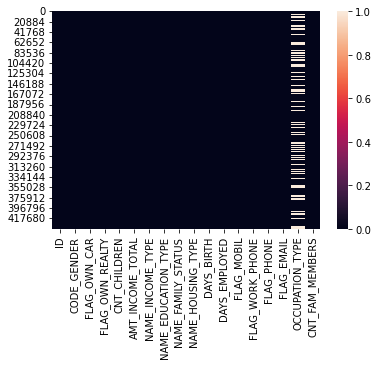

In [10]:
# checking for null values
sns.heatmap(apprecord.isnull()) 

Here occupation_type has many null values.

<AxesSubplot:>

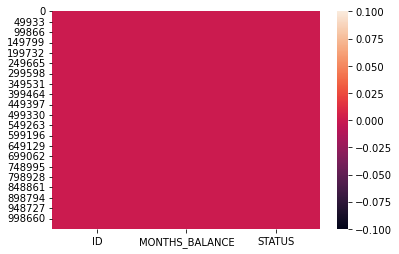

In [11]:
# checking for null values in credid Record
sns.heatmap(creditrecord.isnull()) 

Here, No null value present.

In [12]:
# There are some duplicates in this dataset so, delete those duplicates and keep the last entry of the ID if its repeated.
apprecord = apprecord.drop_duplicates('ID', keep='last') 

In [13]:
#occupation_type has many missing values, will drop this column
apprecord.drop('OCCUPATION_TYPE', axis=1, inplace=True) 

In [14]:
#checking the columns that have non numeric values to see if they are useful
ot = pd.DataFrame(apprecord.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [15]:
#CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS
num_type = pd.DataFrame(apprecord.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']

In [16]:
# checking just to see what each column is and importance of columns
a1 = apprecord[object_type]['CODE_GENDER'].value_counts()
b1 = apprecord[object_type]['FLAG_OWN_CAR'].value_counts()
c1 = apprecord[object_type]['FLAG_OWN_REALTY'].value_counts()
d1 = apprecord[object_type]['NAME_INCOME_TYPE'].value_counts()
e1 = apprecord[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f1 = apprecord[object_type]['NAME_FAMILY_STATUS'].value_counts()
g1 = apprecord[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a1,"\n",b1,'\n', c1, '\n', d1, '\n', e1, '\n', f1, '\n', g1)

F    294412
M    144098
Name: CODE_GENDER, dtype: int64 
 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 
 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 
 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 
 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 
 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 
 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAM

Here, all of them are important since there is very fine classifcation in each column. So,their importance cannot be judged at this moment so we convert all of them to numeric values.

In [17]:
# importing labelencoder to change categorical data into numrical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in apprecord:
    if apprecord[x].dtypes=='object':
        apprecord[x] = le.fit_transform(apprecord[x])

In [18]:
apprecord.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0


<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

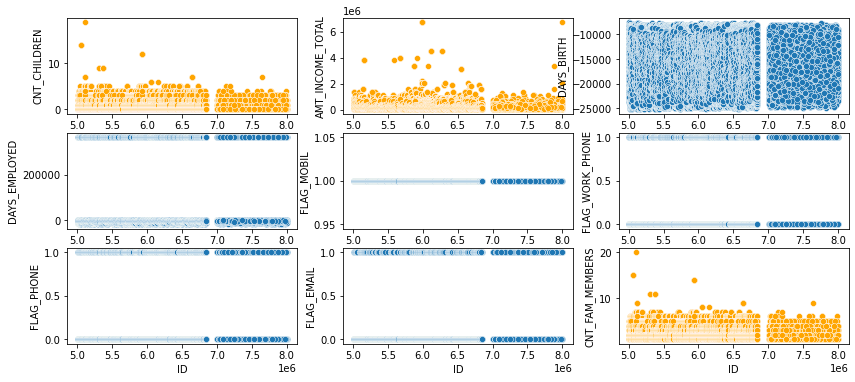

In [19]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=apprecord, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=apprecord, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=apprecord, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=apprecord, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=apprecord, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=apprecord, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=apprecord, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=apprecord, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=apprecord, ax=ax[2][2], color= 'orange')

There are outliers in 3 columns.<br>
    a) CNT_CHILDREN<br>
    b) AMT_INCOME_TOTAL<br>
    c) CNT_FAM_MEMBERS<br>
So, remove these outliers to make sure they do not affect results.

In [20]:
# FOR CNT_CHILDREN COLUMN
q_hi = apprecord['CNT_CHILDREN'].quantile(0.999)
q_low = apprecord['CNT_CHILDREN'].quantile(0.001)
apprecord = apprecord[(apprecord['CNT_CHILDREN']>q_low) & (apprecord['CNT_CHILDREN']<q_hi)]

# FOR AMT_INCOME_TOTAL COLUMN
q_hi = apprecord['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = apprecord['AMT_INCOME_TOTAL'].quantile(0.001)
apprecord= apprecord[(apprecord['AMT_INCOME_TOTAL']>q_low) & (apprecord['AMT_INCOME_TOTAL']<q_hi)]

#FOR CNT_FAM_MEMBERS COLUMN
q_hi = apprecord['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = apprecord['CNT_FAM_MEMBERS'].quantile(0.001)
apprecord= apprecord[(apprecord['CNT_FAM_MEMBERS']>q_low) & (apprecord['CNT_FAM_MEMBERS']<q_hi)]

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

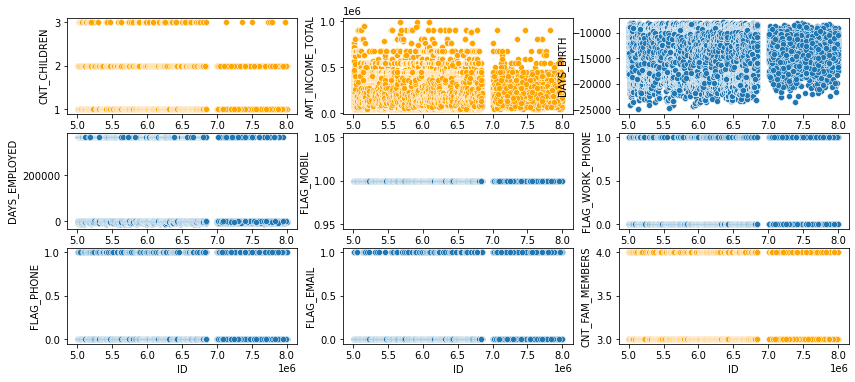

In [21]:
# Noe plot again to check outliers
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=apprecord, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=apprecord, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=apprecord, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=apprecord, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=apprecord, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=apprecord, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=apprecord, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=apprecord, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=apprecord, ax=ax[2][2], color= 'orange')

In [22]:
# calculate months from today column to see how much old is the month.
# and also sort the data according to ID and Months from today columns.
creditrecord['Months from today'] = creditrecord['MONTHS_BALANCE']*-1
creditrecord = creditrecord.sort_values(['ID','Months from today'], ascending=True)
creditrecord.head(10)

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [23]:
# count values of status to see how many values exist of each type
creditrecord['STATUS'].value_counts() 

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [24]:
# 1,2,3,4,5 are classed as 1 since they are the same kind, 
# and C and X are same type thus change the values of C and X to 0. 
# These will be our labels and prediction results for data.
creditrecord['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
creditrecord['STATUS'] = creditrecord['STATUS'].astype('int')
creditrecord['STATUS'] = creditrecord['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [25]:
# Again, count values of status to see how many values exist of each type
creditrecord['STATUS'].value_counts(normalize=True)

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

Therefore, based on the results above, we may infer that the data is oversampled because labels 0 are 99% and 1 are only 1% of the total dataset. In order to remedy the oversampling issue and make sense of our study, we must first connect the two datasets.

In [26]:
# we are grouping the data in creditrecord by ID so that we can join it with apprecord
creditrecordgb = creditrecord.groupby('ID').agg(max).reset_index()
creditrecordgb.head() 

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [27]:
df = apprecord.join(creditrecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0


In [28]:
# checking df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 29 to 434805
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int32  
 2   FLAG_OWN_CAR         9516 non-null   int32  
 3   FLAG_OWN_REALTY      9516 non-null   int32  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int32  
 7   NAME_EDUCATION_TYPE  9516 non-null   int32  
 8   NAME_FAMILY_STATUS   9516 non-null   int32  
 9   NAME_HOUSING_TYPE    9516 non-null   int32  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  FLAG_MOBIL           9516 non-null   int64  
 13  FLAG_WORK_PHONE      9516 non-null   int64  
 14  FLAG_PHONE           9516 non-null   int64  
 15  FLAG_EMAIL           9516 non-null 

### Separate the data into dependant and independant variable. Identify a target variable that will be predicted.

In [29]:
X = df.iloc[:,1:-1] # X value contains all the variables except labels
y = df.iloc[:,-1] # labels

In [30]:
y.value_counts()

0    9365
1     151
Name: STATUS, dtype: int64

In [31]:
# import train_test_split to split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [32]:
print(X_train.shape)
print(X_test.shape)

(6661, 16)
(2855, 16)


In [33]:
# Scaling the data for better result and low comptation
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [34]:
# remove oversampling here
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [35]:
y_train.value_counts()

0    6551
1     110
Name: STATUS, dtype: int64

In [36]:
y_balanced.value_counts()

0    6551
1    6551
Name: STATUS, dtype: int64

### Models:

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
models = {
    "LinearRegression" : LinearRegression(),
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisionTree" : DecisionTreeClassifier()
}

In [39]:
train_scores = []
test_scores = []
for key, model in models.items():
    model.fit(X_balanced, y_balanced)
    train_score = model.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = model.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)
print(train_scores)
print(test_scores)

[0.08867081763281193, 0.6242558388032361, 0.9771790566325752, 0.9943520073271256]
[0.03383203868423601, 0.6153162757640369, 0.773454157782516, 0.8253375977256574]


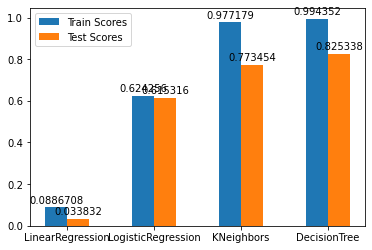

In [40]:
models = ["LinearRegression", "LogisticRegression", "KNeighbors", "DecisionTree"]

x = np.arange(len(models))
width = 0.25

fig, ax =plt.subplots()
bar1 = ax.bar(x-width/2,train_scores,width,label = 'Train Scores')
bar2 = ax.bar(x+width/2,test_scores,width,label = 'Test Scores')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.bar_label(bar1, padding=2)
ax.bar_label(bar2, padding=2)

plt.rcParams['figure.figsize'] = [20, 20]

plt.show()

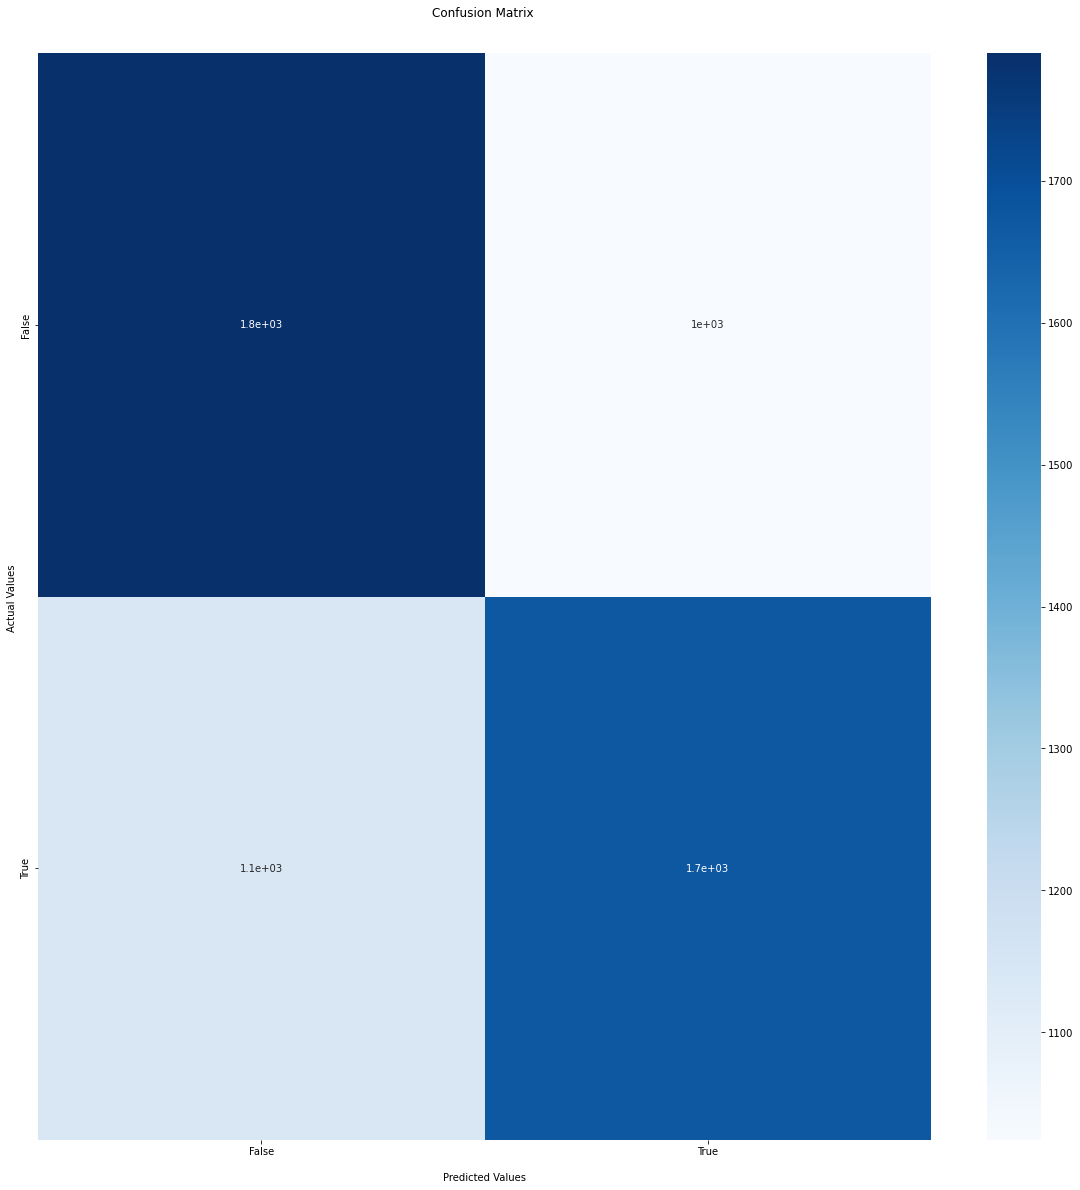

In [41]:
from sklearn.metrics import confusion_matrix

model1 = LogisticRegression()
model1.fit(X_balanced, y_balanced)
y_pred = model1.predict(X_test_balanced)
#Generate the confusion matrix

cf_matrix = confusion_matrix(y_test_balanced, y_pred)



ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.rcParams['figure.figsize'] = [10, 10]
## Display the visualization of the Confusion Matrix.
plt.show()

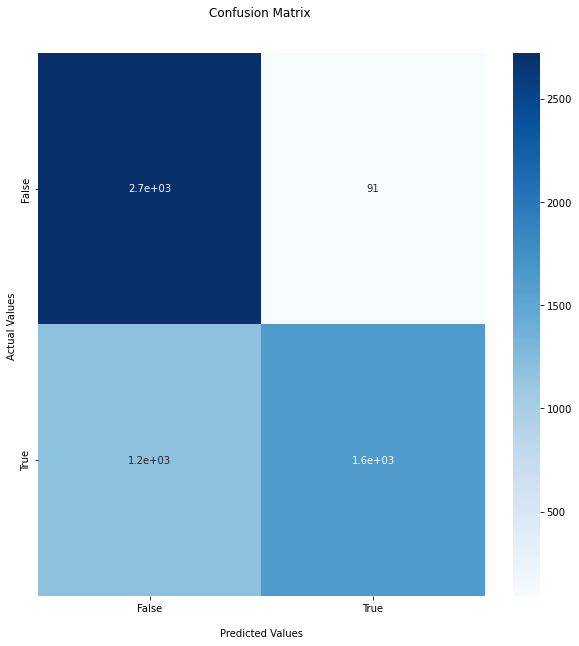

In [42]:
model2 = KNeighborsClassifier()
model2.fit(X_balanced, y_balanced)
y_pred = model2.predict(X_test_balanced)
#Generate the confusion matrix

cf_matrix = confusion_matrix(y_test_balanced, y_pred)



ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.rcParams['figure.figsize'] = [5, 5]
## Display the visualization of the Confusion Matrix.
plt.show()

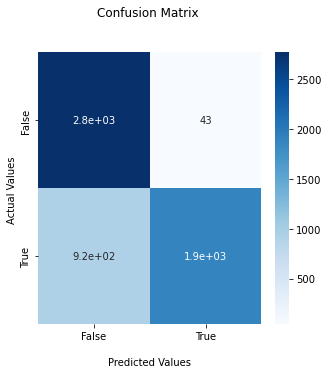

In [43]:
model3 = DecisionTreeClassifier()
model3.fit(X_balanced, y_balanced)
y_pred = model3.predict(X_test_balanced)
#Generate the confusion matrix

cf_matrix = confusion_matrix(y_test_balanced, y_pred)



ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.rcParams['figure.figsize'] = [5, 5]
## Display the visualization of the Confusion Matrix.
plt.show()

### Feature impotance

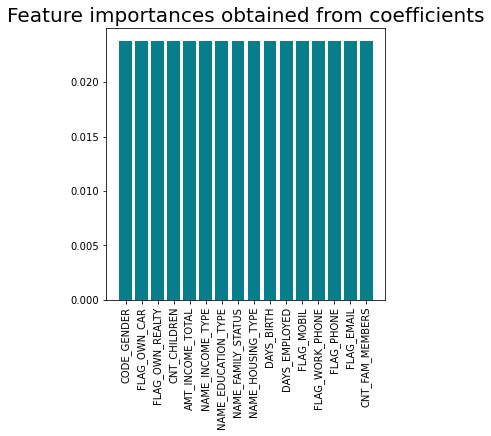

In [44]:
model = LinearRegression()
model.fit(X_balanced, y_balanced)
importances = pd.DataFrame(data={
    'Attribute': X_balanced.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In Linear Regression model all the features are same importance  

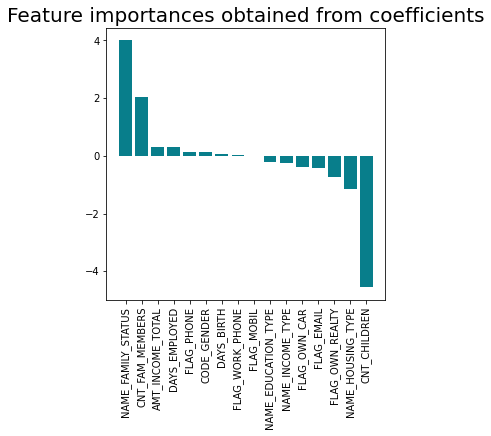

In [45]:
model = LogisticRegression()
model.fit(X_balanced, y_balanced)
importances = pd.DataFrame(data={
    'Attribute': X_balanced.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In the above plot we can see the imporatance of the feature in the Logistic Regression model.

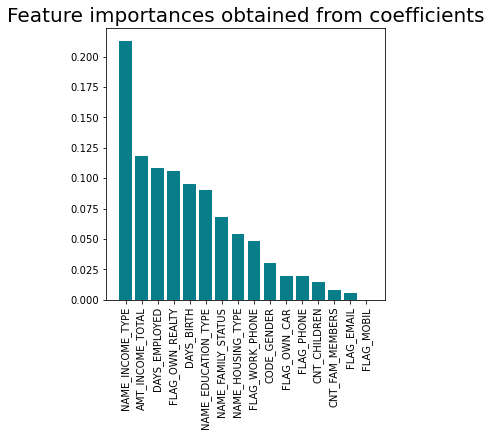

In [46]:
model = DecisionTreeClassifier()
model.fit(X_balanced, y_balanced)
importances = pd.DataFrame(data={
    'Attribute': X_balanced.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In the above plot we can see the imporatance of the feature in the Decision Tree Classifier model.

# Project-2

In [54]:
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit

In [55]:
dt_classifier = DecisionTreeClassifier()

In [56]:
my_param_grid = {'min_samples_leaf': [6, 10, 20, 40],
                 'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                 'criterion': ['entropy'],
                 'min_impurity_decrease': [1e-2, 7e-3]}
my_cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)

In [57]:
dt_model_gs = GridSearchCV(estimator=dt_classifier, 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='accuracy',
                           verbose = 0,
                           return_train_score = True)

In [58]:
dt_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'min_impurity_decrease': [0.01, 0.007],
                         'min_samples_leaf': [6, 10, 20, 40],
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.05]},
             return_train_score=True, scoring='accuracy')

In [59]:
dt_model_gs.best_params_

{'criterion': 'entropy',
 'min_impurity_decrease': 0.01,
 'min_samples_leaf': 6,
 'min_weight_fraction_leaf': 0.01}